# 1. Introduction
La informació i el entreteniment que consumim ha de captar la nostra atenció d'alguna manera i és necessari que tinguin un titol que cridi l'atenció, algunes entitats arriben al punt d'esciure un titular que no té relació amb el contingut que es presenta, a aquesta pràctica se l'anomena "clickbait".

En aquesta pràctica s'analitza una base de dades del Kaggle que conté dues columnes, la primera conté els titulars de diferents notícies de distints mitjans de comunicació i la segona conté un camp booleà que diu si és clickbait o no.

Les dades són recollides de diferents mijans. Els titulars que són clickbait sorgeixen de mitjans com ‘BuzzFeed’, ‘Upworthy’, ‘ViralNova’, ‘Thatscoop’, ‘Scoopwhoop’ i ‘ViralStories’. Els titlulars veritables o que no són clickbait són de mitjans fiables com ‘WikiNews’, ’New York Times’, ‘The Guardian’, i ‘The Hindu’.

Es poden aplicar diferents algorismes de classificació per a classificar les dades en clickbait o no clickbait, en aquest projecte s'utilitza Naive Bayes.

Els temes següents es tractarien com a esquema per a aquest article:

* Informació del dataset
* Anàlisis de les dades
* Preparació de les dades

## Dependències
Per aquest projecte és necessari instalar les següents llibreries:

* Pandas and Numpy: Ajuda a tractar les dades.
* MatplotLib and Seaborn: Per visualitzar les dades.
* SkLearn: Ofereix eines per entrenar les dades.
* NTLK i string: Ofereix eines per a convertir paraules.


In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score, accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS

# 2. Informació del dataset
El primer pas de tots els problemes d'Aprenentatge Computacional és llegir les dades i entendre-les, en aquesta secció es visualitzarà i es tractarà de compendre les dades del dataset.

En cas de que fes falta, també es farà neteja del dataset.

In [2]:
# Load Dataset
dataset = pd.read_csv('../Dataset/clickbait_data.csv')

In [3]:
# Shape del dataset
print("El dataset té:", dataset.shape[0], "entrades.\n")
print("Primeres 5 línies del dataset:")
dataset.head()

El dataset té: 32000 entrades.

Primeres 5 línies del dataset:


,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


Com podem veure, hi ha una quantitat d'informació considerable en el dataset. Hi ha una columna headline i una clickbait, la primera és un camp string i la segona un int que pren valor 0 o 1.

Ara es mirarà si hi ha valors buits en el dataset.

In [4]:
# Comprovacio de si hi ha valors nuls
print("Hi ha valors NaN? ", dataset.isnull().values.any())

# Comprovació de si són el tipus correcte
print("Tipus de variable en clickbait: ", dataset['clickbait'].dtype)
dataset['clickbait'] = dataset['clickbait'].astype(bool)
print("Tipus de variable en clickbait despres de la conversió: ", dataset['clickbait'].dtype)

Hi ha valors NaN?  False
Tipus de variable en clickbait:  int64
Tipus de variable en clickbait despres de la conversió:  bool


In [5]:
np.count_nonzero(dataset['clickbait'])

15999

Tenim que 15.999 dels 32.000 elements tenen la columna clickbait a 1, que vol dir que són clickbait, llavors 16.001 linees titulars no són clickbait.

Utilitzant la llibreria WordCloud es poden visualitzar les paraules que més es repeteixen en els titulars depenent de si són clickbait o no. No aporta molt al objectiu d'aquest projecte, però mostra de manera visual informació que pot ser interessant.

Paraules més frequents en titulars que no són clickbait:


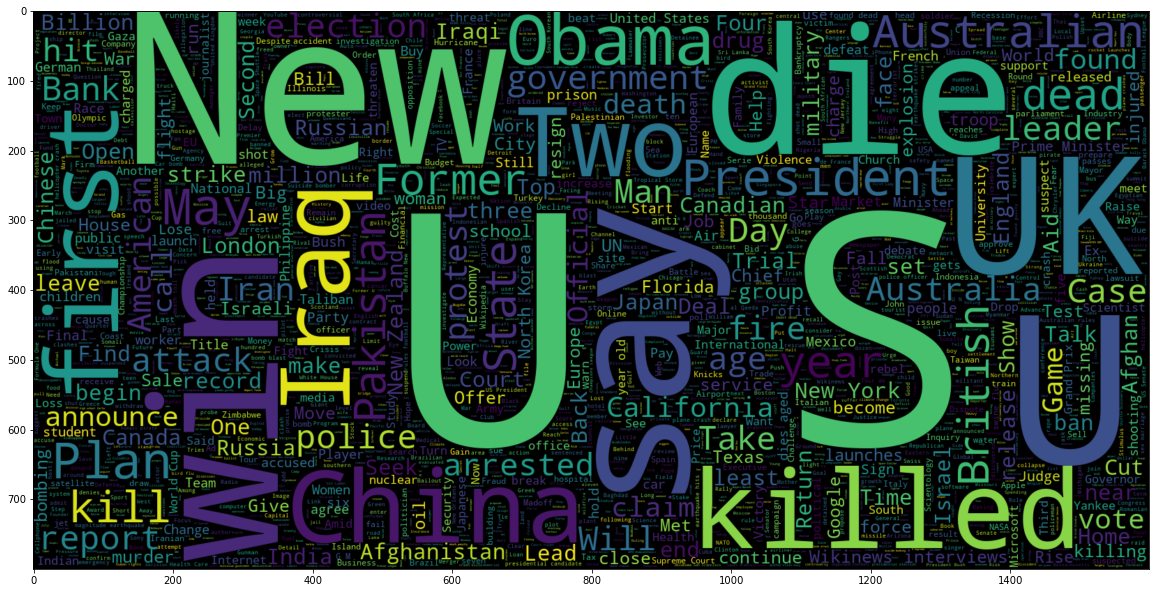

In [6]:
print("Paraules més frequents en titulars que no són clickbait:")
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(dataset[dataset.clickbait == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')
plt.grid(False)

Paraules més frequents en titulars que són clickbait:


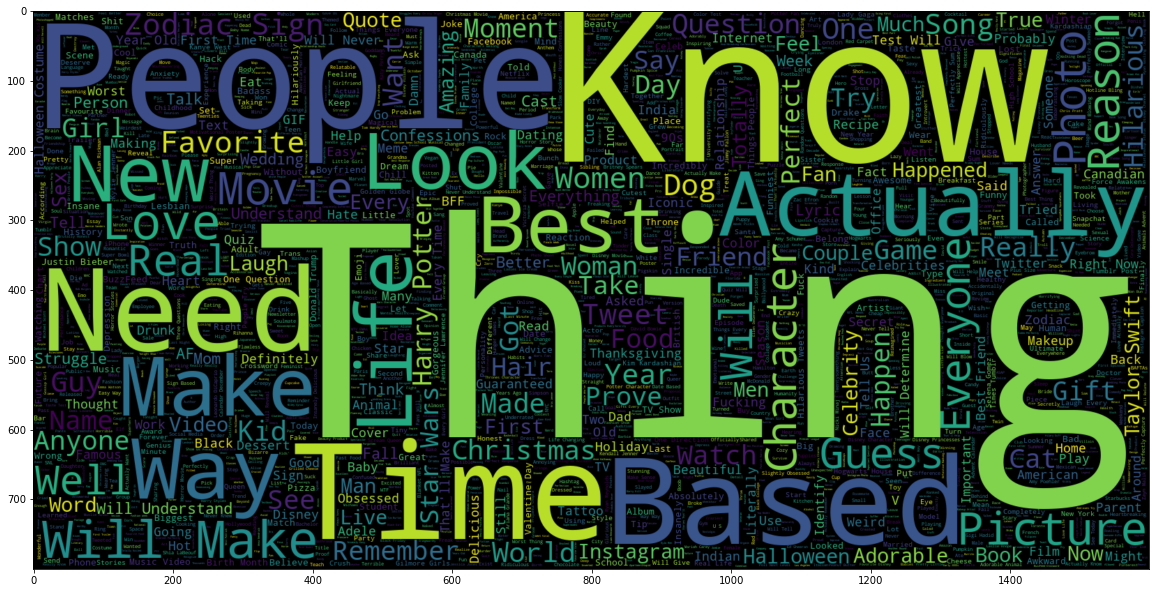

In [7]:
print("Paraules més frequents en titulars que són clickbait:")
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(dataset[dataset.clickbait == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')
plt.grid(False)

# 3. Anàlisis de les dades
Ara que ja s'ha oservat les dades del dataset i es té un bon enteniment d'aquestes, es tractarà de analitzar-les

Primerament, es mostra una descripció del dataset:

In [8]:
dataset.describe()

,headline,clickbait
count,32000,32000
unique,32000,2
top,Should I Get Bings,False
freq,1,16001


Com s'ha vist abans, el dataset compta amb 32.000 línies, pel que fa la columna clickbait: hi ha dos valors unics, True o False, la freqüencia amb la que trobem un valor True és de 16.001.

Visualtizacio de la variable clickbait: 


<AxesSubplot:xlabel='clickbait', ylabel='count'>

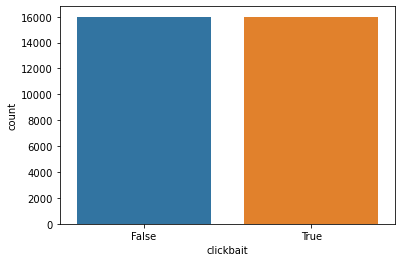

In [9]:
print("Visualtizacio de la variable clickbait: ")
sns.countplot(x=dataset.clickbait)

Com hem vist anteriorment, la distribució de titulars que són clickbait o no és quasi meitat i meitat.
# 4. Preparació del dataset
En aquest apartat, es modificaran les dades i la estructura dels sets de la manera que permeti fer una predicció més precisa.
## Separar en train i test sets
Primer de tot és necessari separar les dades en training set i testing set, en el primer hi haurà un 75% del les dades i en el segon un 25%.

In [10]:
train_x,test_x,train_y,test_y=train_test_split(dataset.headline, dataset.clickbait)

Mitjançant la funció train_test_split de sklearn es separa en train i test. En la variable indepent, x, es guarden els titulars i en la variable dependent, y, es guarden els booleans de cada titular que diuen si és clickbait o no.

A continuació es mostra quin tamany tenen cada un:

In [11]:
print("Nombre d'elements en el training set: ", train_x.shape[0])
print("Nombre d'elements en el test set: ", test_x.shape[0])

Nombre d'elements en el training set:  24000
Nombre d'elements en el test set:  8000


## Separar els titulars en paraules
Es divideixen els titulars en llistes de paraules, per tal de poder analitzar els titulars paraula per paraula.

In [12]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)
print(train_x.head())

412      [We, Need, To, Talk, About, Matt, Healy's, Guy...
830      [Which, Banned, Book, Influenced, You, The, Most]
6718     [This, Is, What, The, Cast, Of, "A, Cinderella...
31360    [Funeral, held, for, former, Zambian, Presiden...
10069    [The, Most, Delicious, Celebrity, Twitter, Bee...
Name: headline, dtype: object


## Preparació dades
Ara que ja hem separat totes les paraules, és necessari eliminar o canviar valor que poden provocar errors o ambigüitats. Per tant, es faran les accions següents:
* Es convertiran totes les paraules a minúscula.
* S'eliminaran paraules innecessaries.
* S'eliminaran elements que poden generar error com paraules buides o caràcters innecessaris com guions o cometes.
* Les paraules de cada titular es convertiran al seu lexema.

In [13]:
# Convertir a minuscula

def minuscula(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(minuscula)
test_x=test_x.apply(minuscula)
print(train_x.head())

412      [we, need, to, talk, about, matt, healy's, guy...
830      [which, banned, book, influenced, you, the, most]
6718     [this, is, what, the, cast, of, "a, cinderella...
31360    [funeral, held, for, former, zambian, presiden...
10069    [the, most, delicious, celebrity, twitter, bee...
Name: headline, dtype: object


S'eliminen paraules de les llistes que no són rellevenants com preposicions, articles i conjuncions. Es fa servir una llista de paraules de la llibreria stopwords, en aquest cas en anglès.

In [14]:
def elimina_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(elimina_stopwords)
test_x=test_x.apply(elimina_stopwords)

S'eliminen punctuacions com punts, guions, apostrofs i cometes.

In [15]:
def elimina_punctuacio(lst):
    new_lst=[]
    for i in lst:
        for j in string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(elimina_punctuacio)
test_x=test_x.apply(elimina_punctuacio) 

S'eliminen numeros, ja que només volem paraules.

In [16]:
def elimina_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in string.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(elimina_numbers)
test_x=test_x.apply(elimina_numbers)

S'eliminen espais que hagin pogut quedar a les paraules.

In [17]:
def elimina_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(elimina_spaces)
test_x=test_x.apply(elimina_spaces)

Es modifiquen les paraules per a que només continguin el seu lexema, aixi s'eviten ambiguitats i el model pot ser molt més precís. S'utilitza la llibreria nltk, que permet convertir les paraules a la seva arrel lexica:

In [18]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' ' for i in x))

Un cop ja s'han modificat les dades i només han quedat els valors que són rellevants per a fer la predicció, ara es transforma els sets de train i test en una matriu amb les diferents paraules i el numero de vegades que apareixen.

In [19]:
cov=CountVectorizer(analyzer='word',max_features=22500)
fit_train_x=cov.fit_transform(train_x)
fit_test_x=cov.transform(test_x)
train_arr=fit_train_x.toarray()
test_arr=fit_test_x.toarray()
pd.DataFrame(test_arr, columns=cov.get_feature_names())

,aa,aaa,aaevpc,aaron,ab,abandon,abandoned,abandoning,abba,abbas,...,zurich,zykina,złoty,ºf,ángel,íngrid,íslands,îledefrance,ürümqi,śrī
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Entrenament del model Multinomial Naive Bayes
Ara es crearà el model i s'entrenarà amb les dades d'entrenament que s'han arreglat i sintetitzat en el punt anterior. De la llibreria sklearn s'utilitza el model Multinomial Naive Bayes. A continuació s'inicialitzarà, s'entrenarà i es provarà si pot fer una bona predicció.

In [20]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

print("Valors de clickbait dels 15 primers titulars")
print(list(test_y)[:15])
print("Valors de clickbait predits pel model dels 15 primers titulars")
print(list(pred)[:15])

Valors de clickbait dels 15 primers titulars
[False, True, False, False, True, True, False, False, False, True, True, False, True, False, False]
Valors de clickbait predits pel model dels 15 primers titulars
[False, True, False, False, True, True, False, False, False, True, True, False, True, False, False]


Després d'haver entrenat i posat  aprova el model es pot observar que els 15 primers elements del test han estat predits correctament. 

Es pot mesurar la la precisió del model, s'obté una precisió del 96%.

In [21]:
def eval_model(y,y_pred):
    print("Puntuació F1:")
    print(f1_score(y,y_pred,average='micro'))
    print("Precisió del model:")
    print(accuracy_score(y,y_pred))
    print("Precisió en percentatge:")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [22]:
eval_model(test_y,pred)
a=round(accuracy_score(test_y,pred)*100,3)

Puntuació F1:
0.95525
Precisió del model:
0.95525
Precisió en percentatge:
95.525 %


A continuació es mostra la confusion matrix. Es pot observar que s'obtenen molts pocs valors falsos (2a i 3a casella), en altres paraules, prediccions incorrectes, per tant, la majoria de prediccions que s'han fet en el test han sigut correctes.

In [23]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,3)], columns=[i for i in range(1,3)])
    sns.set(font_scale=1.3)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['Clickbait','No clickbait'],yticklabels=['Clickbait','No clickbait'])
    plt.xlabel("Classes Predides");
    plt.ylabel("Classes Reals");

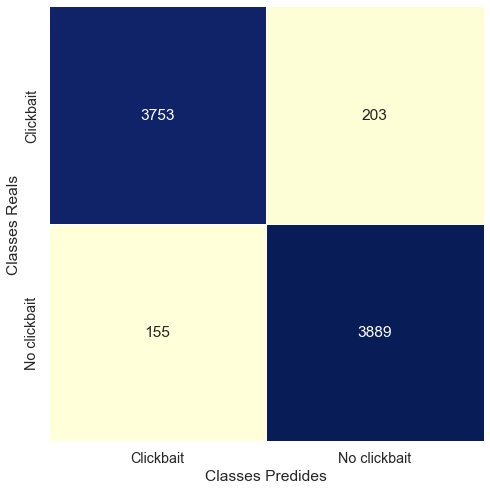

In [24]:
confusion_mat('YlGnBu')

# 6. Conclusions
En la actualitat, les webs de noticies i creadors de contingut busquen captar l'atenció dels usuaris, fins al punt de que mentiran en els seus titulars per a guanyar un click.

Després d'analitzar milers de titulars separats en clickbait o no, es pot observar que molts titulars que són clickbait tenen paraules en comú que es repeteixen en molts d'aquests. 

Un cop s'han preparat les dades per ser analitzades, es pot crear un model que pot predir si un titular és clickbait o no. El fet de decidir si ho és o no sembla subjectiu, però objectivament es pot predir si un titular és veritable o mentida.